In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cwd=os.getcwd()
print(cwd)

c:\Users\Soledad.Acuna\Desktop\brushup\challege


In [2]:
df=pd.read_csv("WorldBank2.csv")
df.head()

,Series Name,Series Code,Country Name,Country Code,2018 [YR2018]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,553.973306037506
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,4431.55559506989
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Algeria,DZA,4782.03470679763
3,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,American Samoa,ASM,13049.3301536176
4,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Andorra,AND,39320.0924463621


In [5]:
df_pivot = df.pivot_table(index='Country Code', columns='Series Name', values='2018 [YR2018]', aggfunc='first').reset_index()
df_pivot.columns = ['Country Code', 'GDP', 'Life Exp']
print(df_pivot)

    Country Code               GDP          Life Exp
0            ABW  31172.8025129725            76.072
1            AFE  1490.70105690211  63.3658626111831
2            AFG  553.973306037506            63.081
3            AFW  1830.94562280839  57.1891392680655
4            AGO  2777.84304168235            62.144
..           ...               ...               ...
261          XKX  4009.12363850589            78.696
262          YEM  1194.82057626298            64.575
263          ZAF  6253.11899645914            65.674
264          ZMB  1331.44924435525            62.342
265          ZWE  1462.59027890974            61.414

[266 rows x 3 columns]


In [7]:
df_pivot.replace(to_replace=[".."], value=np.nan, inplace=True)
df_pivot.isna().sum() 

Country Code     0
GDP             11
Life Exp         9
dtype: int64

In [12]:
df_pivot_nan = df_pivot.dropna() 

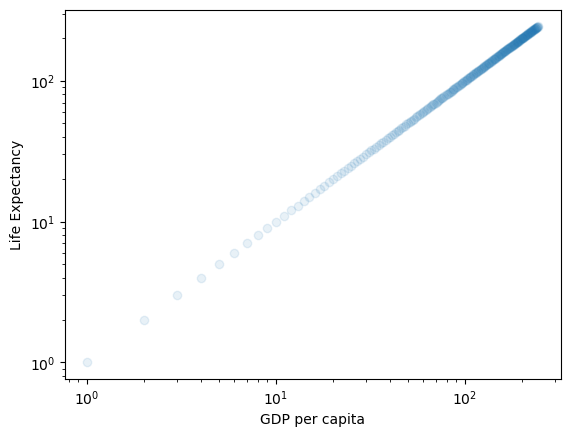

In [20]:
plt.scatter(df_pivot_nan["GDP"], df_pivot_nan["Life Exp"], alpha=0.1)
plt.xlabel('GDP per capita')
plt.xscale('log')
plt.ylabel('Life Expectancy')
plt.yscale('log')
plt.show()